# Table of Contents
 <p><div class="lev1"><a href="#deriviation"><span class="toc-item-num">1&nbsp;&nbsp;</span>deriviation</a></div><div class="lev2"><a href="#具体的な計算"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>具体的な計算</a></div><div class="lev1"><a href="#exact-solution"><span class="toc-item-num">2&nbsp;&nbsp;</span>exact solution</a></div><div class="lev1"><a href="#Numerical-estimate"><span class="toc-item-num">3&nbsp;&nbsp;</span>Numerical estimate</a></div><div class="lev1"><a href="#Incomplete-information"><span class="toc-item-num">4&nbsp;&nbsp;</span>Incomplete information</a></div><div class="lev1"><a href="#解説(日本語)"><span class="toc-item-num">5&nbsp;&nbsp;</span>解説(日本語)</a></div><div class="lev2"><a href="#具体例"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>具体例</a></div><div class="lev2"><a href="#Example-1"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Example 1</a></div><div class="lev1"><a href="#書き直し"><span class="toc-item-num">6&nbsp;&nbsp;</span>書き直し</a></div>

# deriviation
コイントスを考える。全種類のコインの裏表が出る確率を決めるパラメーター$\theta$、各試行でどのコインを使ったかを表す$z$、全試行の結果$x$ 


$z$は未知。$z$について周辺化した対数尤度を考える。

$\log (\sum_z P(x,z; \theta))$

これを最大化するような$\theta$が結局は知りたい。

zについての任意の確率分布$Q(z)$を使って、この周辺化対数尤度は次の不等式で抑えられる

$\log (\sum_z P(x,z; \theta) = \log (\sum_z Q(z) \cdot \frac{P(x,z;\theta)}{Q(z)}) \geq \sum_z Q(z) \log (\frac{P(x,z; \theta)}{Q(z)})$ 

なぜなら、Jensenの不等式から凸関数fについて(ふつう凸関数といったら下に凸)

$E_P[f(x)] \geq f(E_P[ x])$

logは上に凸だから

$\log (E_Q[x])  \geq E_Q[\log (x)]$

更新式 $\hat{\theta}^{(t+1)} = \mathrm{arg max}_{\theta} g_t(\theta)$

$Q(z) :=  P(z|x; \hat{\theta}^{(t)})$ とおいて、


$g_t(\theta) = \sum_z P(z|x;\hat{\theta}^{(t)})\log (\frac{P(x,z;\theta)}{P(z|x;\hat{\theta}^(t))})$

ベイズ的な見方

$\theta$が既知とすれば、

$ P(z| x,\theta)  =  \frac{P(x|z,\theta) P(z)}{P(x|\theta)} $

## 具体的な計算
1回の試行でn回コイントスをする。i回目の表が出た回数を$x_i$とする。m回試行する。
コインはA, Bの2種類ある。各コインの表が出る真の確率は$\theta_j, j \in \{A,B\}$とする。 i回目の試行で使ったコインを$z_i \in \{A,B\}$とする。

$P(x_i|z_i,\theta) = B(x_i | m, \theta_{z_i}) = _m C_{x_i} \theta_{z_i}^{x_i}(1-\theta_{z_i})^{m-x_i}$

$P(x|z,\theta) = \Pi_{i=1}^m P(x_i|z_i,\theta)$

$P(x,z|\theta) = P(x|z,\theta) P(z)$

$P(z_i | x_i, \theta) = \frac{ P(x_i|z_i,\theta) P(z_i) }{P(x_i|\theta)}$

そもそも分からないのが$P(x_i|\theta)$ じゃん。どうすんの？

$P(x_i|\theta) = \int P(z_i) P(x_i|z_i,\theta) dz$

In [1]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')
np.random.seed(1234)

np.set_printoptions(formatter={'all':lambda x: '%.3f' % x})

In [2]:
from IPython.display import Image
from numpy.core.umath_tests import matrix_multiply as mm

In [2]:
from scipy.optimize import minimize
from scipy.stats import bernoulli, binom

2種類のコインを１試行M回、N=5試行繰り返す

In [5]:
#  thetas : 表が出る確率
# binom(a,b) : 確率bのベルヌーイ試行をa回したときの確率分布
# 対数尤度の負
def neg_loglik(thetas, n, xs, zs):
    return -np.sum([binom(n, thetas[z]).logpmf(x) for (x, z) in zip(xs, zs)])

In [11]:
m = 10
# 表になる確率
theta_A = 0.8
theta_B = 0.3
theta_0 = [theta_A, theta_B]

coin_A = bernoulli(theta_A)
coin_B = bernoulli(theta_B)

# rvs : 試行
# mapの返り値をlistにすれば結果が得られる
xs = list(map(sum, [coin_A.rvs(m), coin_A.rvs(m), coin_B.rvs(m), coin_A.rvs(m), coin_B.rvs(m)]))
zs = [0, 0, 1, 0, 1]

# exact solution

In [12]:
xs = np.array(xs)
ml_A = np.sum(xs[[0,1,3]])/(3.0*m)
ml_B = np.sum(xs[[2,4]])/(2.0*m)
ml_A, ml_B

(0.80000000000000004, 0.20000000000000001)

# Numerical estimate

In [9]:
bnds = [(0,1), (0,1)]
# minimize : 第一引数が最小化したい関数、第二引数がその関数への第一引数の初期値
minimize(neg_loglik, [0.5, 0.5], args=(m, xs, zs),
         bounds=bnds, method='tnc', options={'maxiter': 100})

     fun: 8.012844299149247
     jac: array([  2.48689958e-06,   1.42108547e-06])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 24
     nit: 7
  status: 1
 success: True
       x: array([ 0.70000001,  0.45000001])

# Incomplete information

x回表/裏が出た
表/裏が出る確率は$\theta$

(1) 各候補について
$\sum_i x_i \log \theta_j = \log \Pi_i \theta_j^{x_i}$

(2)
$\exp(\sum_i x_i \log \theta_i) = \Pi_i \theta_i^{x_i}$

試行xがAっぽいかBっぽいか
$w_A = \Pi_i \theta_{Ai}^{x_i} / (\Pi_i \theta_{Ai}^{x_i} + \Pi_i \theta_{Bi}^{x_i})$

(3)
$v_A = x w_A$

だから

$v_A + v_B = x$

In [18]:
xs = np.array([(5,5), (9,1), (8,2), (4,6), (7,3)])
thetas = np.array([[0.6, 0.4], [0.5, 0.5]])

tol = 0.01
max_iter = 100

ll_old = 0

for i in range(max_iter):
    ws_A = []
    ws_B = []
    vs_A = []
    vs_B = []
    ll_new = 0
    
    # E step
    for x in xs:
        # multinomial log likelihood (1)
        ll_A = np.sum([x*np.log(thetas[0])])
        ll_B = np.sum([x*np.log(thetas[1])])
        
        # [EQN 1] (2)
        denom = np.exp(ll_A) + np.exp(ll_B)
        w_A = np.exp(ll_A) / denom
        w_B =  np.exp(ll_B) / denom
        ws_A.append(w_A)
        ws_B.append(w_B)
        
        # used for calculating theta (3)
        vs_A.append(np.dot(w_A, x))
        vs_B.append(np.dot(w_B, x))
        
        # update complete log likelihood
        # wで重みづけ
        ll_new += w_A * ll_A + w_B * ll_B
    
    # M-step : update values for parameters given current distribution
    # [EQN 2] (4)
    thetas[0] = np.sum(vs_A, 0) / np.sum(vs_A)
    thetas[1] = np.sum(vs_A, 0) / np.sum(vs_A)

In [25]:
np.sum(vs_B, 1)

array([ 5.,  5.,  5.,  5.,  5.])

In [26]:
ws_A

[0.5, 0.5, 0.5, 0.5, 0.5]

In [27]:
ws_B

[0.5, 0.5, 0.5, 0.5, 0.5]

# 解説(日本語)


http://convexbrain.osdn.jp/cgi-bin/wifky.pl?p=EM%A5%A2%A5%EB%A5%B4%A5%EA%A5%BA%A5%E0

観測X,隠れ変数Y,パラメーター$\theta$

ベイズの定理より

$\ln p(X|\theta) = \ln \frac{p(X,Y|\theta)}{P(Y|X,\theta)}= \ln p(X,Y|\theta) - \ln P(Y|X,\theta)$

任意の確率密度関数を$q(Y)$とする。

$\ln p(X|\theta) = \ln p(X|\theta) \int q(Y) dY = \int q(Y) \ln p(X|\theta) dY$

$=  \int q(Y) \ln \frac{p(X,Y|\theta}{q(Y)} dY  + \int q(Y) \ln \frac{q(Y)}{p(Y|X,\theta)}dY$

適当な$\theta^t$を与えて、$q(Y) = p(Y|X,\theta^t)$ 

$\ln p(X|\theta) = \int p(Y|X,\theta^t) \ln \frac{p(X,Y|\theta)}{p(Y|X,\theta^t)} dY + \int p(Y|X,\theta^t) \ln \frac{p(Y|X,\theta^t)}{p(Y|X,\theta)}dY$

第１項を$L(\theta,\theta^t)$とおく。

$L(\theta,\theta^t) = \int p(Y|X,\theta^t) \ln p(X,Y|\theta) dY - \int p(Y|X,\theta^t) \ln p(Y|X,\theta^t) dY$

第１項を$Q(\theta,\theta^t)$とおく。

Mステップ : $L(\theta,\theta^t)$を$\theta$について最大化する。$L$の第２項は$\theta$に関係ないので、実質$Q$を最大化すればいい。 最大になるような$\theta$を$\theta^{t+1}$として繰り返す。

なんで$\ln p(X|\theta)$の第２項は考えないの？

なぜなら、 
$\theta^{t+1} := \mathrm{argmax}_{\theta} L(\theta,\theta^t)$だから、当然

$L(\theta^{t+1},\theta^t) \geq L(\theta^t,\theta^t)$

が成り立つ。そして、第二項はKL情報量 $KL(p(Y|X,\theta^t)||p(Y|X,\theta))  \geq 0$

第１項を最大化すれば、必ず対数尤度は大きくなるから。

## 具体例


1回の試行でn回コイントスをする。i回目の表が出た回数を$x_i$とする。m回試行する。
コインはA, Bの2種類ある。各コインの表が出る真の確率は$\theta_j, j \in \{A,B\}$とする。 i回目の試行で使ったコインを$z_i \in \{A,B\}$とする。

$Q(\theta,\theta^t) = \int p(z|x,\theta^t) \ln p(x,z|\theta) dz$

## Example 1

http://www.ms.uky.edu/~mai/sta705/EMexamples.pdf

$Q(\theta|\theta^t) := E[\ln g(x|\theta) | y, \theta^t]$

$\ln g(y|\theta) \geq Q(\theta|\theta^t) - Q(\theta^t | \theta^t) + \ln g(y|\theta^t)$

* 男のふたごがmペア
* 女のふたごがfペア
* 異性のふたごがoペア

p : ペアが一卵性(identical)である確率pとと子どもが男である確率qを推定

観測 f=(m,f,o), パラメーター$\theta = (p,q)$

同性のペアのうち、いくつが一卵性か？
完全データ$x=(m_1,m_2, f_1,f_2,o)$

多項分布

$g(x|\theta) = \left(\begin{array}{c} m+f+o\\ m_1,m_2, f_1,f_2,o \end{array}\right)
(pq)^{m_1} [(1-p) q^2]^{m_2} [p(1-q)]^{f_1} [(1-p)(1-q)^2]^{f_2}[(1-p)2q(1-q)]^o$

対数尤度は

$\ln g(x|\theta) = (m_1+f_1)\ln p + (m_2+f_2+o)\ln (1-p) + (m_1 +2m_2+o)\ln q  + (f_1+2f_2+o) \ln (1-q) + Const.$

Eステップ

$m_1^{(t)}  = E[m_1 | y, \theta^{(t)}]  = m \frac{p^{(t)}q^{(t)}}{p^{(t)}q^{(t)}+(1-p^{(t)})(q^{(t)})^2}$

ベイズの定理から求まるっぽい

$E[m_1|y,\theta^t] = \frac{1}{N} $

$y,\theta^n$が分かっているとき、$m_1,m_2$の期待値(=尤度最大）は

$m_1+m_2=m$ 

$m_1$が$m_1^'$だったとき、


コインがありました。10回ふって、3回表でした。このコインが表になる確率はいくつだと推定されますか？

表になる確率を$\theta$とすると、その推定値$\theta^*$は

$\theta^* = \mathrm{argmax}_{\theta} {}_{10}C_3 \theta^3(1-\theta)^{10-3}$

対数をとってもいいので

$\theta^* = \mathrm{argmax}_{\theta} 3\ln \theta + (10-3) \ln (1-\theta)$

$f(\theta) = 3 \ln \theta  + 7 \ln (1-\theta)$　が最大値をとるときの$\theta$を求める。



$\theta$の期待値は？

$E_p[\theta] =  \int p(x) \theta dx$

$E_p[\theta] = \int $

# 書き直し

In [243]:
import numpy as np
import scipy.stats as st

np.random.seed(0)

# Problem setting
N = 10
M = 20
theta_true = np.array([0.8, 0.2])
z_true = np.random.randint(2, size=N)
x = np.zeros(N, dtype=int)
for i in range(0, N):
    x[i] = st.binom.rvs(M, theta_true[z_true[i]])
print(x)

# Initial estimates
t = 0    
t_max = 50
thetas = np.zeros([2, t_max]) 
thetas[:,t] = np.array([0.5, 0.4])

[15  4  6 13  3  5  4  4  7  2]


ステップ1

In [246]:
def get_post_z_i(z_i, x_i, M, theta):
    norm_c = 0 # Normalization term in denominator 
    for j in range(0,2):
        p_j = st.binom.pmf(x_i, M, theta[j])
        norm_c = norm_c + p_j
        if z_i == j:
            ll = p_j
    return ll / norm_c
        
# Check implementation
post_z_A = get_post_z_i(0, x[1], M, thetas[:,t])
post_z_B = get_post_z_i(1, x[1], M, thetas[:,t])
post_z_all = post_z_A + post_z_B
print("success") if  (post_z_all  > 1.0-1.0e-6 and post_z_all  < 1.0+1.0e-6) else print("BUG")

success


ステップ2

In [247]:
def neg_expect(theta_next, theta_cur, x):
    N = x.size
    e = 0
    for i in range(0, N): # for trial i
        for j in range(0, 2): # used coin j
            post_z = get_post_z_i(j, x[i], M, theta_cur)
            prob_x = st.binom.logpmf(x[i], M, theta_next[j])
            e = e + post_z *prob_x
    return -e

# Sample calculation
bnds = [(0,0.99), (0,0.99)]
res = minimize(neg_expect, thetas[:,t], args=(thetas[:,t], x),
         bounds=bnds, method='SLSQP', options={'maxiter': 1000})
res.x

array([ 0.52252573,  0.22841559])

In [248]:
t = 0
while t < t_max-1:
    if t % 10 == 0:
        print(str(t) + "/" + str(t_max))
    res = minimize(neg_expect, thetas[:,t], args=(thetas[:,t], x),
         bounds=bnds, method='SLSQP', options={'maxiter': 1000})
    thetas[:,t+1] = res.x
    t = t + 1

0/50
10/50
20/50
30/50
40/50


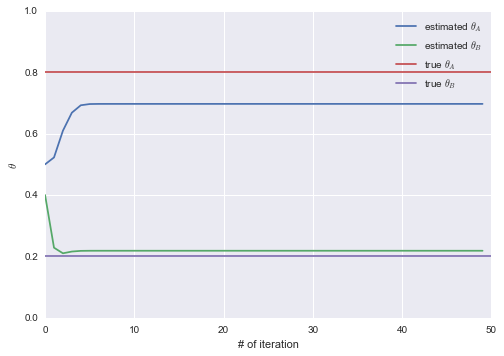

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns
# result 
plt.plot(np.arange(0,t_max), thetas[0,:])
plt.plot(np.arange(0,t_max), thetas[1,:])
# true value
plt.plot([0, t_max], np.ones(2) * theta_true[0])
plt.plot([0, t_max], np.ones(2) * theta_true[1])
plt.ylim([0, 1])
plt.xlabel('# of iteration')
plt.ylabel(r'$\theta$')
plt.legend([r'estimated $\theta_A$',r'estimated $\theta_B$',r'true $\theta_A$',r'true $\theta_B$' ])
plt.savefig('result.png')